# PyEIS: Tutorial on importing experimental data, linear Kramers-Kronig analysis, masking data, and equivalent circuit fitting
This notebook introduces how to import experimental data files and use the build-in functions for linear Kramers-Kronig analysis and equivalent circuit fitting with PyEIS in Jupyter Lab.

The experimental data that is exemplified herein was genereated from a macrodisk electrode that was placed in a three-electrode cell with a outer-sphere redox-active mediator in solution. The E$_{1/2}$ of the redox couple is around -0.9 V, and the data included was measured at -1.05 and -1.10 V, thus the oxidized specie is attrached to the electrode/electrolyte interface where it is reduced and diffuses away. We can apply the Randles circuit to the experimenta data due to the electrode geometry and assume semi-infinite linear mass-transport to the surface of the electrode.


The Initial step, is to import the PyEIS into the notebook using the following line:

In [2]:
from PyEIS import *

## Importing and plotting data
Supported data files are imported into a pandas dataframe [1] through the EIS_exp() function. This function requires a folder "path", datafile name "data", and have the possiblity of limiting cycle number through "cycle", as well as the data can be limited by frequency using "mask". In this following example, we'll import data from two different files that are loacted in the same folder and look at the data structure. First, we'll import the two data files in seperate parameters.

In [4]:
ex1 = EIS_exp(path='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/Tutorials/data/', data=['ex1.mpt'])

In [5]:
ex2 = EIS_exp(path='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/Tutorials/data/', data=['ex2.mpt'])

The data contained within each parameter (ex1 and ex2) can be accesed by calling ex1/ex2.df_raw (here we'll call df_raw.head() to only view the top five rows) and as illustrated below, a number of coloumn names exist where the most significant coloumns are f (frequency), w (angular frequency), re (real), im (imaginary), and cycle_number. 

In [6]:
ex1.df_raw.head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,Y_re,Y_im,Y_mag,Y_phase,Unnamed: 18,w
0,200019.480,428.90558,372.31183,567.95782,-40.959641,13125.243035,-1.050056,-0.003182,0.002137,0.000918,1.0,12,0.009270,0.000016,0.001330,0.001154,0.001761,40.959641,NaN,1.256759e+06
1,149677.700,389.09244,779.30804,871.04187,-63.467991,13125.926037,-1.050440,-0.003601,0.001364,0.001092,1.0,12,0.010166,0.000012,0.000513,0.001027,0.001148,63.467991,NaN,9.404527e+05
2,112011.700,790.36896,1276.19290,1501.11670,-58.229328,13126.609058,-1.050325,-0.003597,0.001113,0.000805,1.0,12,0.010198,0.000007,0.000351,0.000566,0.000666,58.229328,NaN,7.037903e+05
3,83828.102,1450.48320,1320.92870,1961.82420,-42.323559,13127.165037,-1.050292,-0.003622,0.001437,0.000652,1.0,12,0.010902,0.000006,0.000377,0.000343,0.000510,42.323559,NaN,5.267075e+05
4,62734.359,1863.74980,1040.74610,2134.64650,-29.179655,13127.722056,-1.050266,-0.003596,0.002438,0.000579,1.0,12,0.010428,0.000005,0.000409,0.000228,0.000468,29.179655,NaN,3.941716e+05


In [7]:
ex2.df_raw.head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,Y_re,Y_im,Y_mag,Y_phase,Unnamed: 18,w
0,200019.480,424.92365,375.77924,567.24786,-41.487789,17279.765173,-1.101518,-0.005266,0.002117,0.000929,1.0,12,0.010313,0.000018,0.001321,0.001168,0.001763,41.487789,NaN,1.256759e+06
1,149677.700,396.26755,828.15405,918.07794,-64.429123,17280.448178,-1.100589,-0.004103,0.001284,0.001045,1.0,12,0.010202,0.000011,0.000470,0.000983,0.001089,64.429123,NaN,9.404527e+05
2,112011.700,854.82782,1316.61760,1569.78100,-57.005928,17281.131160,-1.100517,-0.004097,0.001079,0.000759,1.0,12,0.010199,0.000006,0.000347,0.000534,0.000637,57.005928,NaN,7.037903e+05
3,83828.102,1515.67830,1308.02000,2002.04820,-40.793968,17281.688179,-1.100429,-0.004093,0.001451,0.000620,1.0,12,0.010834,0.000005,0.000378,0.000326,0.000499,40.793968,NaN,5.267075e+05
4,62734.359,1899.30960,997.15741,2145.15720,-27.699944,17282.245162,-1.100481,-0.004097,0.002544,0.000550,1.0,12,0.010455,0.000005,0.000413,0.000217,0.000466,27.699944,NaN,3.941716e+05


The data contained within any of these can be called by calling the parameter."name of coloumn", as illustrated below

In [8]:
print(ex1.df_raw.f[0:5])
print()
print(ex2.df_raw.re[0:5])

0    200019.480
1    149677.700
2    112011.700
3     83828.102
4     62734.359
Name: f, dtype: float64

0     424.92365
1     396.26755
2     854.82782
3    1515.67830
4    1899.30960
Name: re, dtype: float64


Hereby the impedance can directly be plotted by calling e.g. the real and imaginary coloumns, as shown

Text(0,0.5,"-Z'' [$\\Omega$]")

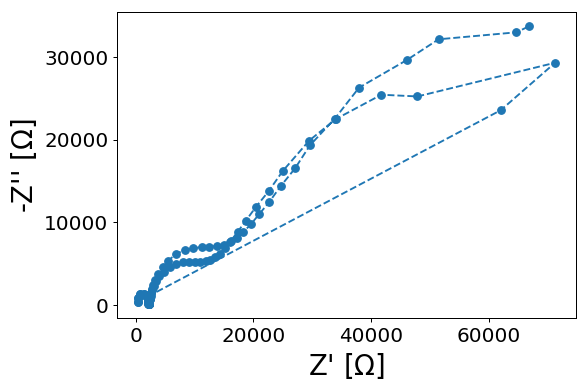

In [9]:
fig = figure(dpi=90, facecolor='w', edgecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)
ax = fig.add_subplot(111)

ax.plot(ex1.df_raw.re, ex1.df_raw.im, 'o--')

ax.set_xlabel("Z' [$\Omega$]")
ax.set_ylabel("-Z'' [$\Omega$]")

However, as illustrated in the Nyquist above each datafiles contains two impedance spectra, i.e. two cycles, as can also be viewed by the cycle number. To seperate the two cycles, each parameter (ex1 and ex2) contains a dataframe (df) that is sorted based on the cycle number. Each dataframe contained the impedance data from their seperate cycle and can be assesed by calling e.g. ex1.df[0] or ex1.df[1] for the first and second cycle, respectively.

In [12]:
ex1.df[0].head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,Y_re,Y_im,Y_mag,Y_phase,Unnamed: 18,w
0,200019.480,428.90558,372.31183,567.95782,-40.959641,13125.243035,-1.050056,-0.003182,0.002137,0.000918,1.0,12,0.009270,0.000016,0.001330,0.001154,0.001761,40.959641,NaN,1.256759e+06
1,149677.700,389.09244,779.30804,871.04187,-63.467991,13125.926037,-1.050440,-0.003601,0.001364,0.001092,1.0,12,0.010166,0.000012,0.000513,0.001027,0.001148,63.467991,NaN,9.404527e+05
2,112011.700,790.36896,1276.19290,1501.11670,-58.229328,13126.609058,-1.050325,-0.003597,0.001113,0.000805,1.0,12,0.010198,0.000007,0.000351,0.000566,0.000666,58.229328,NaN,7.037903e+05
3,83828.102,1450.48320,1320.92870,1961.82420,-42.323559,13127.165037,-1.050292,-0.003622,0.001437,0.000652,1.0,12,0.010902,0.000006,0.000377,0.000343,0.000510,42.323559,NaN,5.267075e+05
4,62734.359,1863.74980,1040.74610,2134.64650,-29.179655,13127.722056,-1.050266,-0.003596,0.002438,0.000579,1.0,12,0.010428,0.000005,0.000409,0.000228,0.000468,29.179655,NaN,3.941716e+05


In [13]:
ex1.df[1].head()

,f,re,im,Z_mag,Z_phase,times,E_avg,I_avg,Cs/µF,Cp/µF,cycle_number,I Range,|Ewe|/V,|I|/A,Y_re,Y_im,Y_mag,Y_phase,Unnamed: 18,w
59,200019.480,418.34854,383.73511,567.68665,-42.528969,14602.427109,-1.050143,-0.002997,0.002074,0.000947,2.0,12,0.009578,0.000017,0.001298,0.001191,0.001762,42.528969,NaN,1.256759e+06
60,149677.700,392.76862,795.51337,887.19147,-63.723076,14603.110115,-1.050444,-0.003171,0.001337,0.001075,2.0,12,0.010163,0.000011,0.000499,0.001011,0.001127,63.723076,NaN,9.404527e+05
61,112011.700,811.14404,1294.87660,1527.95950,-57.935913,14603.793117,-1.050284,-0.003169,0.001097,0.000788,2.0,12,0.010151,0.000007,0.000347,0.000555,0.000654,57.935913,NaN,7.037903e+05
62,83828.102,1486.03610,1327.09240,1992.35470,-41.766186,14604.350107,-1.050366,-0.003163,0.001431,0.000635,2.0,12,0.010887,0.000005,0.000374,0.000334,0.000502,41.766186,NaN,5.267075e+05
63,62734.359,1884.14940,1044.49850,2154.29710,-29.002268,14604.906123,-1.050274,-0.003148,0.002429,0.000571,2.0,12,0.010448,0.000005,0.000406,0.000225,0.000464,29.002268,NaN,3.941716e+05


Note, in the above that the coloum cycle_number is == 1 and 2 in each dataframe. The same data can now shown in the Nyquist plot as shown

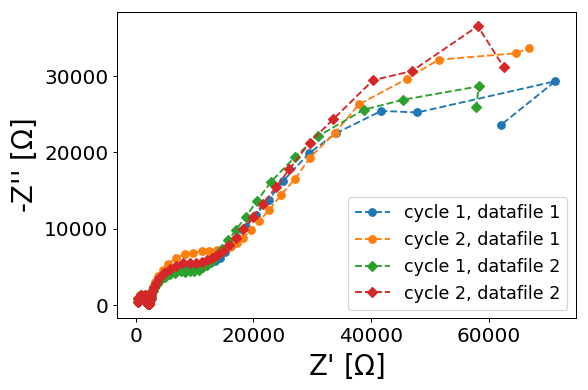

In [10]:
fig = figure(dpi=90, facecolor='w', edgecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)
ax = fig.add_subplot(111)

ax.plot(ex1.df[0].re, ex1.df[0].im, 'o--', label='cycle 1, datafile 1')
ax.plot(ex1.df[1].re, ex1.df[1].im, 'o--', label='cycle 2, datafile 1')

ax.plot(ex2.df[0].re, ex2.df[0].im, 'D--', label='cycle 1, datafile 2')
ax.plot(ex2.df[1].re, ex2.df[1].im, 'D--', label='cycle 2, datafile 2')

ax.set_xlabel("Z' [$\Omega$]")
ax.set_ylabel("-Z'' [$\Omega$]")

ax.legend(loc=0)

The procedure of acceses data and plotting it in Nyquist and/or Bode plot is automatically incorporated in the EIS_plot function as exemplified below. A full description of EIS_plot() function is exemplfied in the PyEIS_simulation_example

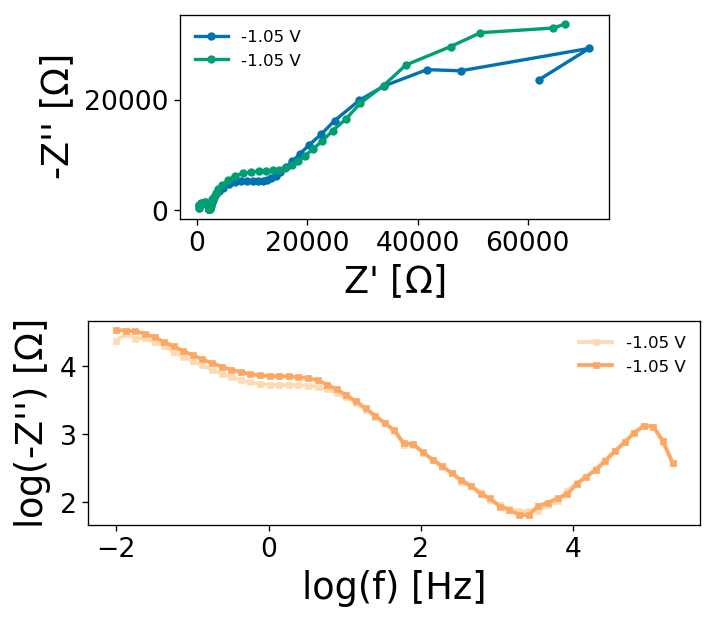

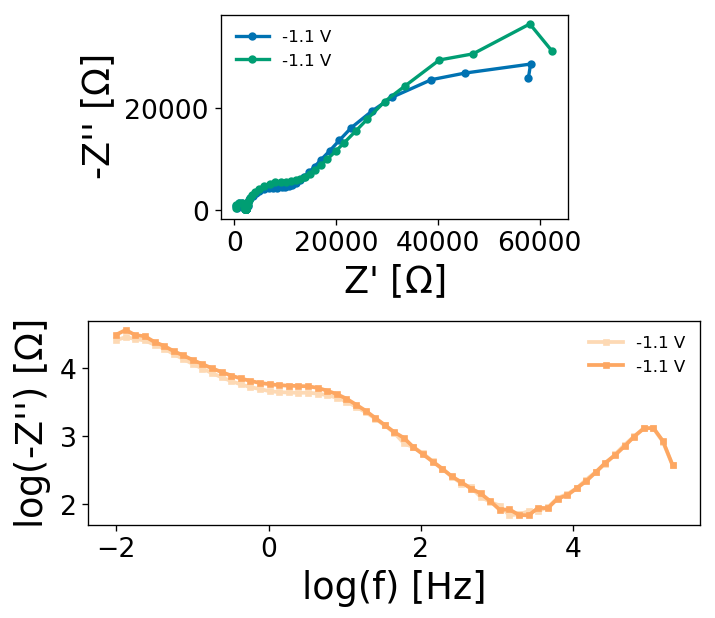

In [11]:
ex1.EIS_plot(legend='potential', bode='log_im')

ex2.EIS_plot(legend='potential', bode='log_im')

This procedure makes data structure easy to acces and visualize. However, as the two datafiles are a part of the same dataset, a more productive method is to import the two datafiles in the same parameter (ex3) as illustrated below

In [ ]:
ex3 = EIS_exp(path='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/Tutorials/data/', data=['ex1.mpt','ex2.mpt'])

ex3.EIS_plot(legend='potential', bode='log_im')

The data structure in ex3 is similar to the previous examples where ex3.df_raw contains all the imported while ex3.df[cycle_no] contains the data for each cycle number. However, as the cycle number in each datafile is 1 and 2, these have to be corrected so that the cycle number in the second file are reformatted and append on the last cycle number from file 1. The cycle number of the second file therefore becomes 3 and 4, as illustrated below

In [ ]:
ex3.df[0].cycle_number[0:5] # cycle 1 from first file

In [ ]:
ex3.df[1].cycle_number[0:5] # cycle 2 from first file

In [ ]:
ex3.df[2].cycle_number[0:5] # cycle 1 from second file

In [ ]:
ex3.df[3].cycle_number[0:5] # cycle 2 from second file

### Extracting specific cycles
Specific cycles can also be extracted from the the dataframe. In the above example, each file contains two impedance spectra from the same applied potential. If we're interested in only using the second cycle from each data file, we can extract these using the build-in cycle parameter in the EIS_exp() function. cycle, which is set equal to [2,4] representing the desired cycle numbers.

In [ ]:
ex4 = EIS_exp(path='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/Tutorials/data/', data=['ex1.mpt','ex2.mpt'], cycle=[2,4])

ex4.EIS_plot(legend='potential', bode='log_im')

## The Linear Kramers-Kronig test and limiting dataset based on frequency 
The linear Kramers-Kronig analysis (Lin-KK) is an investigation of the requirement of casuality, which dictate that the real and imaginary parts of any impedance function to be interdependent provided that the following conditions are meet: a) causality, the response must be related to the excitation signal, b) linearity, only the first-order term is present in the response signal (requires small excitation signals), c) stability, the system may not drift during the measurment, and d) finite. The Lin-KK analysis is a mathematical analysis of the quality of the collected data and the relative residuals should be free of harmonics. The Lin-KK analysis incorporated in PyEIS is based on Boukamp orginal work [2] with the later optimization for number of RC-elements by Schönleber et al. [3]. The Lin-KK analysis is performed by fitting a number of RC-elements to the experimental data through a weighed complex non-linear least squares fitting procedure (CNLS). The fit is performed utilizing the impedance terms for an RC-element given by eq. 1-3.

### $Z_{fit}(\omega) = R_s + \sum\limits_{k=1}^M \frac{R_k}{1+j\omega \tau_k}$ (1)

where k is specific RC-element and M the total number of RC-element, $\tau$ the time contant of the RC-element given by eq. 2-4.

### $\tau_{min} = \frac{1}{\omega_{max}}$  (2)

### $\tau_{max} = \frac{1}{\omega_{min}}$  (3)

### $\tau_k = 10^{\Big[log(t_{min} + \frac{k-1}{M-1} \cdot \big(\frac{\tau_{max}}{\tau_{min}}\big) \Big]}$  (4)

$\tau$ is thus equially distributed between the mininum and maximum frequencies of the experimental dataset, leaving $R_k$ to be the only unknown in the fit. The CNLS fitting procedure is described in detail in the next section, here the fit is performed for R$_k$ and the residuals is determined using eq. 5-6.

### $\Delta Z'(\omega) =  \frac{Z'(\omega) - Z'_{fit}}{Z(\omega)}$  (5)

### $\Delta Z''(\omega) =  \frac{Z''(\omega) - Z''_{fit}}{Z(\omega)}$ (6)

Traditionally, 7 RC-elements are applied per decade following Boukamps [2] orginal suggestion, however under- and over-fitting can lead to incorrect analysis and recently Schönleber et al. [3] utilized the oscallating R$_k$'s as a descriptor for goodness of fit through the parameter $\mu$. The $\mu$-value is normalized between 1 and 0 and a $\mu$ value equal to 1 suggest underfitting as the mass of negatively signed R$_k$'s is small compared to the mass of positively signed elements. Overfitting starts, when the mass of the negatively signed R$_k$'s starts to increase and $\mu$ goes to zero following eq. 7.

### $\mu = \frac{\sum\limits_{R_k<0} |R_k|}{\sum\limits_{R_k \geq 0} |R_k|}$ (7)

This Lin_KK procedure is incorported in PyEIS and set to default. The linear Kramers-Kroning analysis is performed in PyEIS by using the build-in function Lin_KK(). The analysis prints out the cycle number, the number of RC-circuits fitted to the experimental data based on the above-mentioned algorithm, and u - the $\mu$-value of the fit.

In [ ]:
ex4.Lin_KK(legend='potential')

The Lin_KK() function can also be hardwired by using the build-in num_RC parameter in the Lin_KK() function. In the example below, the number of RC circuits is set to 4.3 RC-elements/decade

In [ ]:
ex4.Lin_KK(legend='potential', num_RC=4.3)
print()
print('number of RC-elements: [1] = ',int(4.3*ex4.decade[0]),' || [2] =', int(4.3*ex4.decade[1]))

In the above example, the data is fitted with 31 RC-elements and gives $\mu$-values of 0.17 and 0.15 for cycle 1 and 2, respectively, clearly illustrating that the data has been overfitted.

The relative residuals of the linear Kramers-Kronig analysis can also be illustrated with the experimental data using the build-in parameter plot, which can be set to 'w_data'

In [ ]:
ex4.Lin_KK(legend='potential', bode='log_im', plot='w_data')

The linear Kramers-Kroning analysis of this specfic set of data (analyzed with a correct number of RC-elements) illustrates that the data contains harmonics suggesting that the ac amplitude was too high. For the purpose of demonstrating the functions of PyEIS, we continue with the dataset none the less.

At high frequencies, the residuals dramaticly increase suggesting a poor data quality and based on this the data can be limited, using the mask parameter in the EIS_exp() function, as shown below where the data is masked between 10$^4$ and 10$^{-1}$

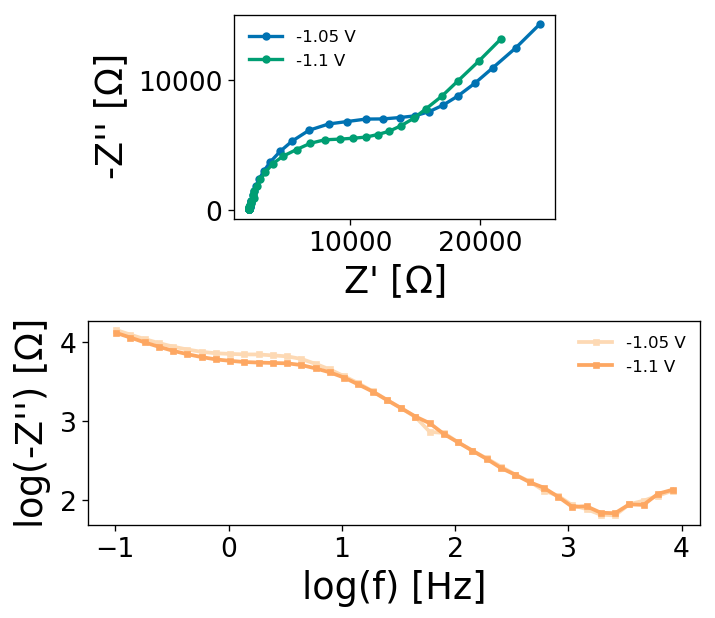

In [15]:
ex5 = EIS_exp(path='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/Tutorials/data/', data=['ex1.mpt','ex2.mpt'], cycle=[2,4], mask=[10**4, 10**-1])

ex5.EIS_plot(legend='potential', bode='log_im')

# The Equivalent Circuit Fitting
The fitting algorithm in PyEIS relies on minimizing the weighed complex non-linear least squares between the experimental data and the real and imaginary parts of the equivalent circuit, as:

## $S = \sum{[ \omega'_i \cdot (Z'_i - Z'_{i,fit})^{2} + \omega''_i \cdot (Z''_i - Z''_{i,fit})^2 ]}$

where $\omega'_i$ and $\omega''_i$ are the statistical weights of the data points and fits over all frequencies [4]. The minimization is carried out using Marquardt-Levenberg Algorith implemented through the lmfit python package [5]. Three weight functions are currently avalialbe: unity-, proportional-, and modulus weighing. As a rule of thumb the latter often, but not always, yields in the lowest relative residuals, i.e. the best fits.

## Time constants of -(RQ)- and -(RC)- circuits

For the purpose of fitting, introducing time contants ($\tau$) into the circuit definations becomes very convinient as fitting bounds can be set to frequencies instead of capacitance or constant phase element values, this makes intially guess of capacitive values equally easy as reading resistances in a Nyquist plot. The time constant or relaxation time is characterized by the response of a first order linear time-invariant system. For -(RC)- systems this is given by

#### $\tau = R \cdot C$

The time constant is also given by the angular frequency ($\omega$), which can be converted into the time domain as follows:

#### $\tau = \frac{1}{\omega} = 2 \pi f_s$

Where f$_s$ is the summit frequency for an -(RC)- curcuit. For distributed elements such as -(Q)-, the exponent n should be included

#### $\tau = \frac{1}{\omega} = (2 \pi f_s)^n$

Now R and Q, or C, can be isolated seperately as:

#### $ R \cdot Q = 1/(2 \pi f_s)^n$

Where

### $R = \frac{1}{(2 \pi f_s)^n \cdot Q}$

and 

### $Q = \frac{1}{(2 \pi f_s)^n \cdot R}$

The impedance of an -(RQ)- circuit can therefore also be given by the following two equations and for a situation where Q is unknown, f$_s$ can instead be used as a fitting parameter:

### $Z_{(RQ)} = \frac{R}{1 + R \cdot Q \cdot (j\cdot \omega)^n} = [\Omega]$

### $Z_{(RQ)} = \frac{R \cdot (2 \pi f_s)^n \cdot R}{1 + R \cdot (2 \pi f_s)^n} = [\Omega]$ 

In a simular fashion, this can be done for R and n. This allows PyEIS to fit or simulate any of the RQ containing circuit using three of the given parameters: R, Q, n, fs. Most applicable is the combinatin of R, n, and fs, as both R and fs can be guessed from the Nyquist and Bode plot, respectivley.

## The equivalent circuit overview

In order to fit any experimental data to an equivalent circuit included in PyEIS, a "fit string" is needed for the EIS_fit() function. All avalaible circuit are illustrated in the equivalent circuit overview with a fit string as noted below

### The Randles Circuit
The experimental data used in the above examples are as previously mentioned from a macrodisk electrode with a reduction occuring at the electrode/electrolyte interface. This system is well-defined and mass-transport to and from the electrode can be simplfied to a 1D linear situation as mass-transport from the side of the disk electrode can be neglected. The impedance of semi-infinite linear diffusion was solved by Warburg [6] with accurate initial and boundary condtions and the combination of a capacitor (or a constant-phase element) and a restance gives the Randles circuit, which represents the experiment well. The Randles circuit requires the following parameters, which can also be viewed in the description of the simulation function cir_Randles_simplified().

<img src='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/pyEIS_images/Randles_circuit.png' width="500" />

#### Parameters:
- Rs = Series resistance [ohm]
- Rct = Charge-transfer resistance [ohm]
- Q = Constant phase element used to model the double-layer capacitance [F]
- fs = Summit frequency of the RQ part [Hz]
- n = Expononent of the CPE [-]
- sigma = Warburg Constant [ohm/s^1/2]

In order to fit the experimental data, a parameter space is needed for the EIS_fit() function with initial guesses for each parameter including lower and upper bounds. In the example below, we'll take use of the summit frequency instead of using the capacitance as this is more easily read of any Bode plot.

In [28]:
params = Parameters() #creates the parameter space

Rs_guess = 2200 #read of the Nyquist plot
params.add('Rs', value=Rs_guess, min=2000, max=2500)

Rct_guess = 20000-Rs_guess #read of the Nyquist plot
params.add('R', value=Rct_guess, min=Rct_guess*.01, max=Rct_guess*10)

fs_guess = 10**0.5 #read of the Bode plot
params.add('fs', value=fs_guess, min=1, max=10**4)

n_guess = 0.8 #guess
params.add('n', value=n_guess, min=.7, max=1) #restricted to be within reasonable values for an interface.

sigma_guess = 1000
params.add('sigma', value=sigma_guess, min=sigma_guess*.0001, max=sigma_guess*1000)

ex5.EIS_fit(params=params, circuit='R-(Q(RW))', weight_func='modulus') #the fit string for a Randles circuit = 'R-(Q(RW))'

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 103
    # data points      = 80
    # variables        = 5
    chi-square         = 239.988511
    reduced chi-square = 3.19984682
    Akaike info crit   = 97.8851534
    Bayesian info crit = 109.795287
[[Variables]]
    Rs:     2262.10649 +/- 10.5531771 (0.47%) (init = 2200)
    R:      10910.9327 +/- 105.534975 (0.97%) (init = 17800)
    fs:     4.35141503 +/- 0.07068436 (1.62%) (init = 3.162278)
    n:      0.96680701 +/- 0.00465636 (0.48%) (init = 0.8)
    sigma:  10554.0375 +/- 54.6868342 (0.52%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(R, fs)     = -0.927
    C(R, n)      = -0.831
    C(fs, n)     =  0.733
    C(R, sigma)  = -0.704
    C(fs, sigma) =  0.680
    C(n, sigma)  =  0.462
    C(Rs, n)     =  0.450
    C(Rs, R)     = -0.366
    C(Rs, fs)    =  0.208
    C(Rs, sigma) =  0.143
None
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
 

The fitting procedure outputs among other the $\chi^2$, number of evaluations, and the value of each fitted parameter. Note that batch fitting automatically occured as the ex5 contained two EIS spectra. To plot the experimental data with the fitted Randles circuit, the EIS_plot() function is utilized where the parameter fitting is set to 'on'

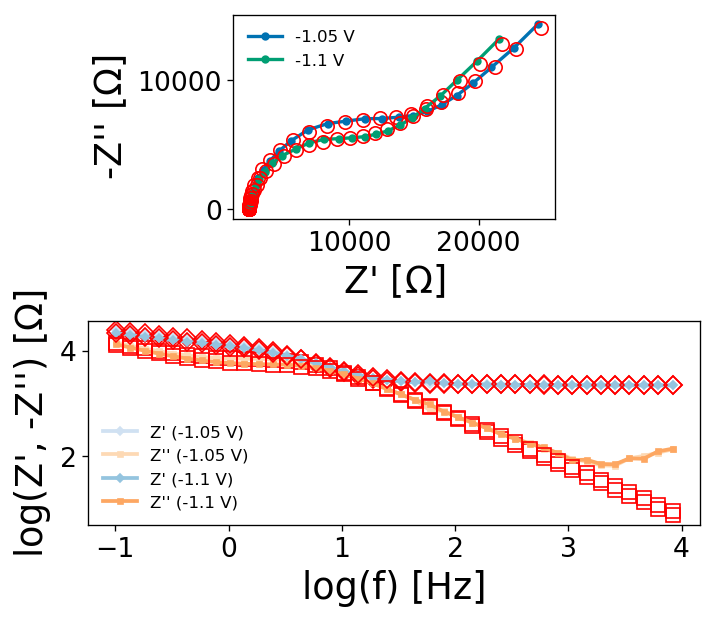

In [23]:
ex5.EIS_plot(legend='potential', bode='log', fitting='on')

This illustrates that a reasonable fit has been achived for both the kinetic and mass-transport regions. A quantitative analysis of the goodness of fit can be performed by turning on the parameter rr, which depicts the relative residuals between the fit and experimental data (not to be confused with the relative residuals of the Lin_KK() analysis)

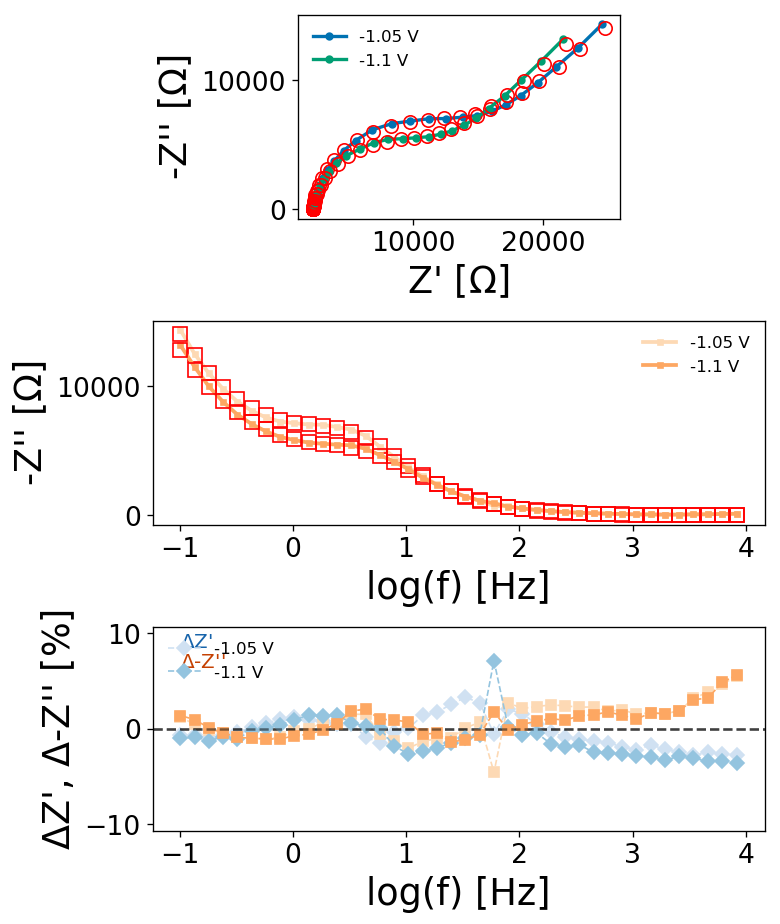

In [24]:
ex5.EIS_plot(legend='potential', bode='im', fitting='on', rr='on')

This gives the ability to quantitaively investigate the fit as a function of frequency.

The fitted parameters that were given in the text output from the EIS_fit() function above are also saved in the function that was called (e.g. ex5), and can be found within this parameter as ex5.fit_"name_of_parameter". As shown below

In [21]:
print(ex5.fit_E)
print(ex5.fit_Rs)
print(ex5.fit_R)
print(ex5.fit_fs)
print(ex5.fit_n)
print(ex5.fit_sigma)

[-1.0502528475, -1.1004496875]
[2262.1064947630716, 2258.7573990970054]
[10910.932658353557, 8686.39669070509]
[4.351415026282387, 5.611226048100575]
[0.966807006420949, 0.9423876290527156]
[10554.037456363216, 9804.441839284478]


This gives the possiblity of directly analyzing the output parameters in the same notebook following an impedance analysis. For this purpose, the potential is also appended as ex5.fit_E as this makes it easy to for instance investigate the kinetics, as exemplified below

Text(0,0.5,'ln(R$_{CT}$) [$\\Omega$]')

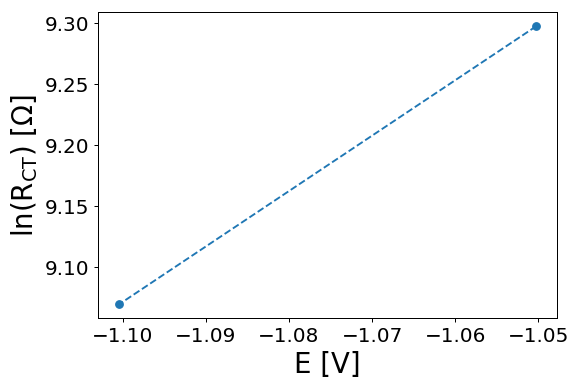

In [19]:
fig = figure(dpi=90, facecolor='w', edgecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, hspace=0.5, bottom=0.1, top=0.95)
ax = fig.add_subplot(111)

ax.plot(ex5.fit_E, np.log(ex5.fit_R), 'o--')

ax.set_xlabel('E [V]')
ax.set_ylabel('ln(R$_{CT}$) [$\Omega$]')

# Refereneces
- [1] McKinney W., "Data Structures for Statistical Computing in Python" Proceedings of the 9th Python in Science Conference, (2010), 51-56 (2010)
- [2] Boukamp B.A., J. Electrochem. Soc., 142, (1995), 1885-1894, "A Linear Kronig-Kramers Transform Test for Immitance Data Validation"
- [3] Schönleber, M. et al., Electochimica Acta, 131, (2014), 20-27 "A Method for Improving the Robustness of linear Kramers-Kronig Validity Tests"
- [4] Lasia A., "Electrochemical Impedance Spectroscopy and its Applications". New York: Springer (2014)
- [5] Newville M., et al. "LMFIT: Non-Linear Least-Square Minimization and Curve-Fitting for Python" (2014) https://doi.org/10.5281/zenodo.11813
- [6] Warburg, E., Annalen der Physik und Chemie, 3, (1899), 493-499,  "Ueber das Verhalten sogenannter unpolarisirbarer Elektroden gegen Wechselstrom"